# WordCloud 1
WordCloud로 자주 등장하는 단어 확인

In [8]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
from wordcloud import WordCloud
from collections import Counter
pd.options.mode.chained_assignment = None  # 경고 숨기기

In [2]:
# wordcloud에서 한글을 사용할 수 있도록 설정하기
font_path = 'C:\\Users\\user\\anaconda3\\envs\\kiwi\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\malgun.ttf'

In [3]:
# 전처리 완료된 데이터 불러오기
from google.colab import files
import pandas as pd

uploaded = files.upload()

news = pd.read_csv('hybe_01.Preprocessing_FIN.csv')

news.head()

Saving hybe_01.Preprocessing_FIN.csv to hybe_01.Preprocessing_FIN.csv


,Date,Title,ppc_Title,Tokens
0,2023-06-01,"하이브, 새 걸그룹 선보인다…데뷔 서바이벌 프로그램 론칭",하이브 새 걸그룹 선보인다 데뷔 서바이벌 프로그램 론칭,하이브 걸그룹 데뷔 서바이벌 프로그램 론칭
1,2023-06-01,BTS '단체활동 중단' 미리 알고…하이브 직원들 주식매도 적발 [1분뉴스],BTS 단체활동 중단 미리 알고 하이브 직원들 주식매도 적발,단체 활동 중단 하이브 직원 주식 매도 적발
2,2023-06-01,"미공개정보 이용한 하이브 직원 후회막심?...SM사태 이후 하이브 급등, 카카오 하락",미공개정보 이용한 하이브 직원 후회막심 SM사태 이후 하이브 급등 카카오 하락,공개 정보 이용 하이브 직원 후회 막심 사태 이후 하이브 급등 카카오 하락
3,2023-06-01,다 오를 때 혼자 부진했는데…'엑소'와의 갈등에 또 다시 악재 맞은 SM,다 오를 때 혼자 부진했는데 엑소 와의 갈등에 또 다시 악재 맞은 SM,때 부진 엑소 와 갈등 악재
4,2023-06-01,“하이브만이 아니었네”…올해 주식 불공정거래 절반이 '미공개정보 이용',하이브만이 아니었네 올해 주식 불공정거래 절반이 미공개정보 이용,하이브 올해 주식 공정 거래 절반 공개 정보 이용


In [6]:
# 각 데이터프레임의 토큰을 하나의 문자열로 변환
## 기존: news = ' '.join(news['Token'].apply(lambda x: ' '.join(x)))

## 수정
news_data = ''
for _, row in news.iterrows():
    news_data += row['Tokens']+ ' '
news_data

'하이브 걸그룹 데뷔 서바이벌 프로그램 론칭 단체 활동 중단 하이브 직원 주식 매도 적발 공개 정보 이용 하이브 직원 후회 막심 사태 이후 하이브 급등 카카오 하락 때 부진 엑소 와 갈등 악재 하이브 올해 주식 공정 거래 절반 공개 정보 이용 활동 중단 조 증발 주식 판 하이브 직원 하이브 적발 금감원 복 내부 정보 이용 엄단 엔하이픈 여자 아이 위 하이브 신인 보이넥스트도어 데뷔 엠 카 인생 컷 아이돌 가능 하이브 빅 히트 쏘스뮤직 인생 컷 오디션 개최 하이브 신인 보이넥스트도어 엠 카 서 음악 방송 데뷔 하이브 서바이벌 프로그램 걸그룹 하이브 양 공시 정보 공개 사례 속출 투자자 곡소리 소속사 직원 주가 급락 매도 손실 회피 하이브 신인 그룹 격돌 팬덤 확보 전략 가지각색 하이브 주가 급등 공백 우려 초유 선관위 특혜 채용 비리 전수 조사 콘래드 서울 방탄소년단 기념 하이브 컬래버레이션 진행 업황 부진 김 남국 불똥 내우외환 나무 속살 법인 출자 개 사업 다각 진심 인 방준혁 팝 시장 배 전망 엔터 주 강세 오늘 증시 메모 하반기 뉴 럭스 출시 메디톡스 매수 위 세븐 틴 빌보드 위 기록 주 연속 차트 방탄소년단 지민 참여 분노 질주 빌보드 핫 위 진입 디자인 기능 등산화 소비자 확장 르세라핌 빌보드 주 연속 진입 정규 집 위 차지 프로 미스 나인 하이라이트 메들리 영상 공개 음악 호주 아미 한국 투모로우바이투게더 미니 집 빌보드 주 연속 차트 흥행 레이스 코스피 기관 매수 상위 종목 일 에너지 솔루션 삼성전자 LG화학 아문디 팝 수익 엔터 위 엔터 랠리 상승세 컨셉 데뷔 티셔츠 출시 여자 아이 퀸 카 인기 유튜브 구독자 조회 수 엑소 첸 백현 시우민 이탈 가능 주가 하락 오늘 증시 일정 월 일 여름철 전기 요금 분납 상공인 뿌리 기업 브루노 마스 뉴진스 곡 작품 진짜 줄 큰일 성장 인정 엔터 강세 시장 규모 배 네오위즈 월 방구석 인디 게임 쇼 개최 하이브 조달 추진 미국 인수 사업 확장 목적 임원 어치 매도 하이브 주가 미술품 투자 스토리 접근 미술 하이

In [9]:
# 한글 폰트 다운로드 - Noto Sans CJK 폰트 설치
import subprocess
!apt-get update -qq
!apt-get install fonts-noto-cjk -qq

# 설치된 폰트 파일 경로 확인
font_path = subprocess.check_output('fc-list :lang=ko | grep "NotoSansCJK" | head -n 1', shell=True).decode().strip().split(':')[0]
# 한글 폰트 설정
path = f'{font_path}'
fontprop = fm.FontProperties(fname=path, size=12)

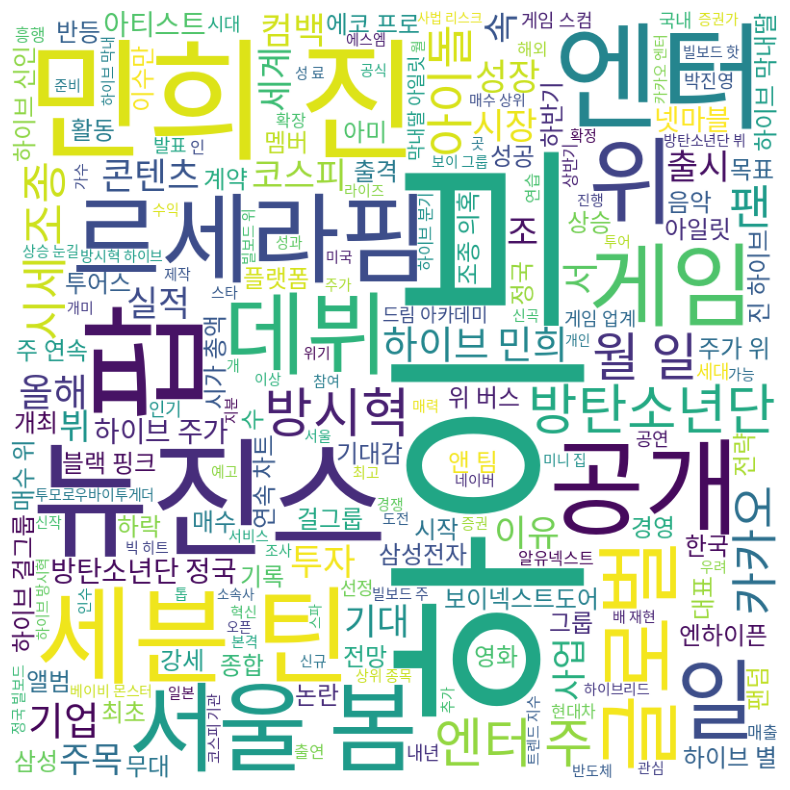

In [11]:
cloud = WordCloud(font_path=font_path,
                  background_color = 'white',
                  width=800, height=800)
my_cloud1 = cloud.generate_from_text(news_data)

arr1 = my_cloud1.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr1)
plt.axis('off')
plt.show()

# 생성한 그림 저장하기
fig.savefig('wordcloud_hybe_01.png')

In [12]:
# Colab에서 파일 다운로드
from google.colab import files
files.download('wordcloud_hybe_01.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. 빈도 확인
WordCloud가 잘 출력됐는지 비교

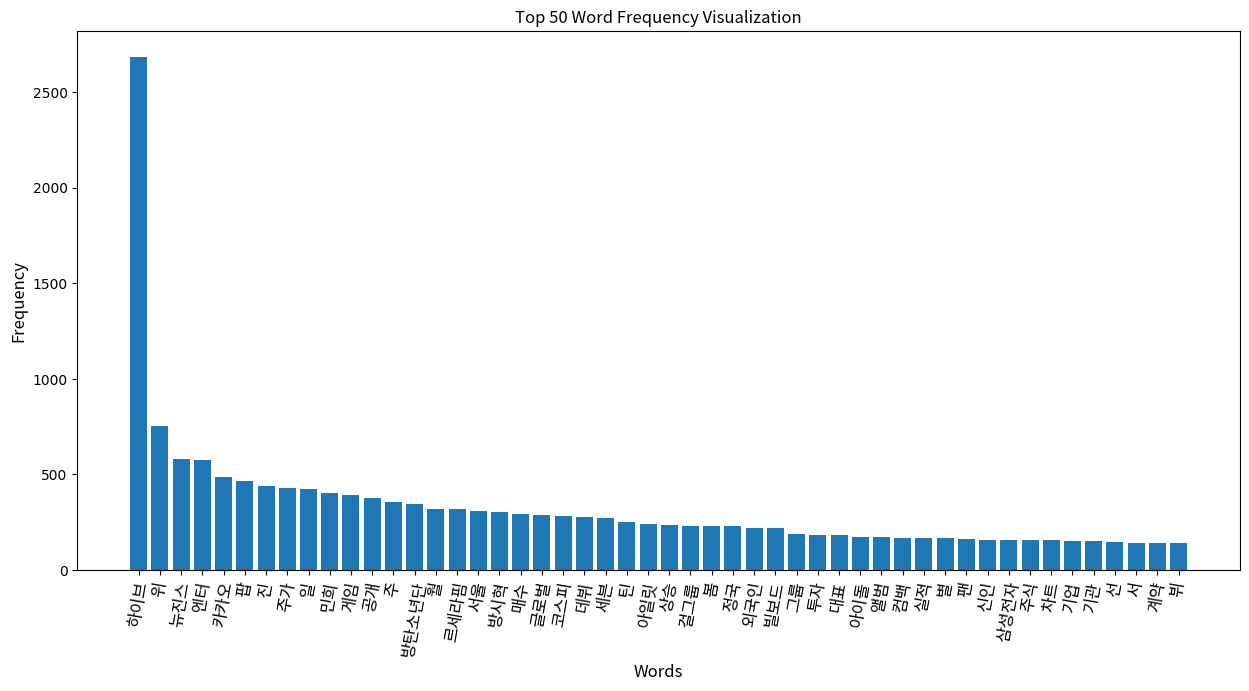

In [14]:
# 단어 빈도수 계산
words = news_data.split()
word_counts = Counter(words)

# 가장 흔한 50개 단어와 빈도수 추출
top_50_words = word_counts.most_common(50)
top_100_words = word_counts.most_common(100)

# 단어와 빈도수를 분리하여 리스트 생성
labels, values = zip(*top_50_words)

# 인덱스 시퀀스 생성
indexes = range(len(labels))

# Matplotlib에 기본 폰트 설정
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [fontprop.get_name()]

# 막대 그래프 생성
plt.figure(figsize=(15, 7))  # 그래프 크기 설정
plt.bar(indexes, values, tick_label=labels)  # 막대 그래프 플로팅

# 축 레이블 설정
plt.xlabel('Words', fontproperties=fontprop)
plt.ylabel('Frequency', fontproperties=fontprop)
plt.title('Top 50 Word Frequency Visualization', fontproperties=fontprop)
plt.xticks(rotation=80, fontproperties=fontprop)
plt.show()